In [96]:
import pandas as pd
import numpy as np
import glob
import xarray as xr

idx = pd.IndexSlice

_daisuquanmy_data_path = r'/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/dai_su_quan_my/raw_data'
_daisuquanmy_data_files = glob.glob(_daisuquanmy_data_path + '/Hanoi_*YTD*.csv')

daisuquanmy_df = pd.DataFrame()
for file in _daisuquanmy_data_files:
    print('Currently processing file \n{}'.format(file))
    daisuquanmy_df = daisuquanmy_df.append(pd.read_csv(file, parse_dates=True))
    
# Remove site year 2015 because inconsistency data
# daisuquanmy_df = daisuquanmy_df[(daisuquanmy_df['Year'] != 2015)]
daisuquanmy_df.drop(columns=['Site', 'Parameter', 'AQI', 'AQI Category','NowCast Conc.', 'Conc. Unit', 'Duration'], inplace=True)
daisuquanmy_df['Date (LT)'] = pd.to_datetime(daisuquanmy_df['Date (LT)'])
# For all Raw Conc <= 0 QC Name must be Missing. Raw Conc change to -999
daisuquanmy_df.loc[daisuquanmy_df['Raw Conc.'] <= 0, 'Raw Conc.'] = -999
daisuquanmy_df.loc[daisuquanmy_df['Raw Conc.'] <= 0, 'QC Name'] = 'Missing'
daisuquanmy_df = daisuquanmy_df.replace(-999, np.nan)
# Fill missing data
daisuquanmy_df.fillna(method='ffill', limit=2, inplace=True)
daisuquanmy_df.fillna(method='bfill', limit=2, inplace=True)
# Remove duplicate, set ['Date (LT)'] as index and sort
daisuquanmy_df.drop_duplicates(subset ="Date (LT)", 
                     keep = "first", inplace = True)
daisuquanmy_df.set_index('Date (LT)', inplace=True)
daisuquanmy_df.sort_index(inplace=True)
# For year 2015 only, take data after 2015-12-09 14:00:00
daisuquanmy_df = daisuquanmy_df.loc[daisuquanmy_df.index >= pd.to_datetime("2015-12-09 14:00:00")]

Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/dai_su_quan_my/raw_data/Hanoi_PM2.5_2015_YTD.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/dai_su_quan_my/raw_data/Hanoi_PM2.5_2019_YTD.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/dai_su_quan_my/raw_data/Hanoi_PM2.5_2020_YTD.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/dai_su_quan_my/raw_data/Hanoi_PM2.5_2016_YTD.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/dai_su_quan_my/raw_data/Hanoi_PM2.5_2021_YTD.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/dai_su_quan_my/raw_data/Hanoi_PM2.5_2017_YTD.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c

In [ ]:
# Find duplicate value in Date (LT)
# Calculate Raw Conc and change them to AQI
# List all columns with missing/ Null variable
# Missing == Raw conc not available
# AQI Category null == Nowcast null == AQI null
# If we remove the data should we calculate AQI from scratch
# If we use the above, we can put a blockage in the data, so when the program read that blockage
# , it know how to skip calculating AQI and know how to skip when making train set and test set.

In [97]:
daisuquanmy_df_copy = daisuquanmy_df.copy()

In [57]:
daisuquanmy_df_copy = daisuquanmy_df_copy[daisuquanmy_df_copy['Year'] == 2015]
# daisuquanmy_df_copy[daisuquanmy_df_copy['QC Name'] == "Valid"].iloc[0]
# Remove all data before 2015-12-09 14:00:00
daisuquanmy_df_copy = daisuquanmy_df_copy.loc[daisuquanmy_df_copy['Date (LT)'] >= pd.to_datetime("2015-12-09 14:00:00")]
daisuquanmy_df_copy = daisuquanmy_df_copy.replace(-999, np.nan)
daisuquanmy_df_copy.fillna(method='ffill', limit=2, inplace=True)
daisuquanmy_df_copy.fillna(method='bfill', limit=2, inplace=True)

In [98]:
daisuquanmy_df_copy

,Year,Month,Day,Hour,Raw Conc.,QC Name
Date (LT),,,,,,
2015-12-09 14:00:00,2015,12,9,14,90.0,Valid
2015-12-09 15:00:00,2015,12,9,15,89.8,Valid
2015-12-09 16:00:00,2015,12,9,16,85.6,Valid
2015-12-09 17:00:00,2015,12,9,17,77.3,Valid
2015-12-09 18:00:00,2015,12,9,18,85.1,Valid
...,...,...,...,...,...,...
2021-02-28 20:00:00,2021,2,28,20,48.0,Valid
2021-02-28 21:00:00,2021,2,28,21,56.0,Valid
2021-02-28 22:00:00,2021,2,28,22,45.0,Valid


In [ ]:
# Downplaying the time from hour to date by mean


<ipython-input-88-0abeb6b8076e>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes[counter] = fig.add_subplot(gs[counter, 0])
<ipython-input-88-0abeb6b8076e>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes[counter] = fig.add_subplot(gs[counter, 0])
<ipython-input-88-0abeb6b8076e>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a futur

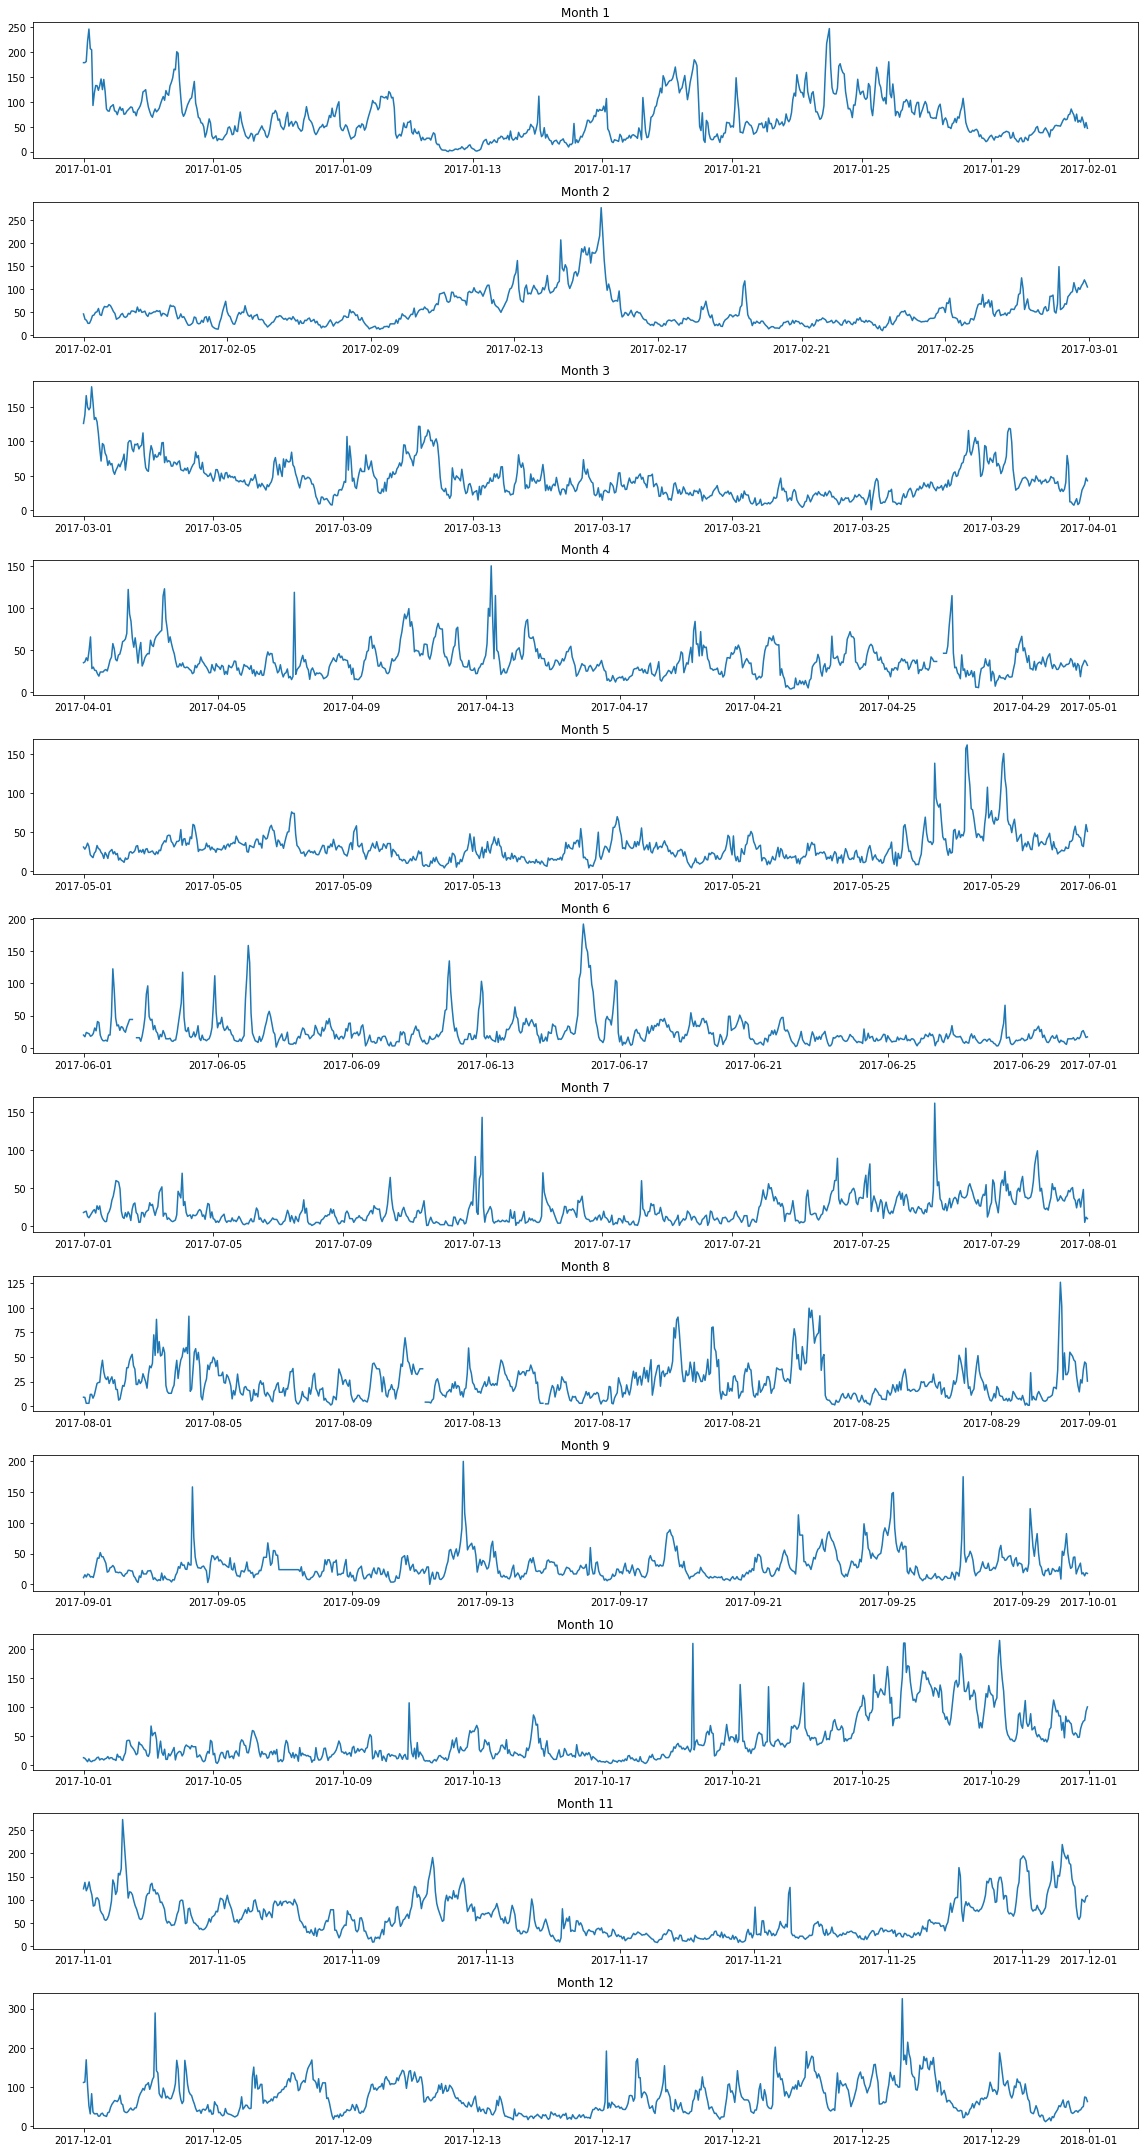

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,30))
gs = fig.add_gridspec(12,1)
axes = []
counter = 0
daisuquanmy_df_copy = daisuquanmy_df[daisuquanmy_df['Year'] == 2017].copy()
for month in daisuquanmy_df_copy['Month'].unique():
    axes.append(fig.add_subplot(gs[counter,0]))
    axes[counter] = fig.add_subplot(gs[counter, 0])
    tmp = daisuquanmy_df_copy[daisuquanmy_df_copy['Month'] == month]
    axes[counter].plot(tmp.index, tmp['Raw Conc.'])
    axes[counter].set_title("Month {}".format(month))
    counter += 1
plt.tight_layout()
plt.show()

<ipython-input-83-e825b9025dc9>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes[counter] = fig.add_subplot(gs[counter, 0])
<ipython-input-83-e825b9025dc9>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes[counter] = fig.add_subplot(gs[counter, 0])
<ipython-input-83-e825b9025dc9>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a futur

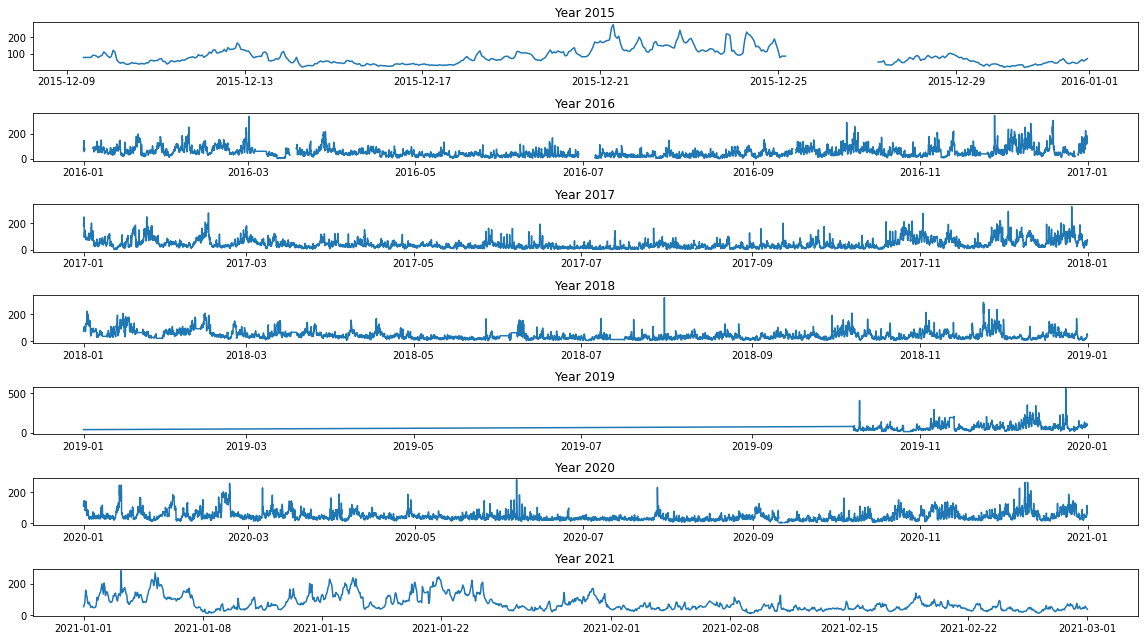

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))
gs = fig.add_gridspec(7,1)
axes = []
counter = 0
for year in daisuquanmy_df['Year'].unique():
    axes.append(fig.add_subplot(gs[counter,0]))
    axes[counter] = fig.add_subplot(gs[counter, 0])
    tmp = daisuquanmy_df[daisuquanmy_df['Year'] == year]
    axes[counter].plot(tmp.index, tmp['Raw Conc.'])
    axes[counter].set_title("Year {}".format(year))
    counter += 1
plt.tight_layout()
plt.show()

In [12]:
daisuquanmy_df['AQI'].describe()

count    37932.00000
mean        87.07756
std        168.49756
min       -999.00000
25%         74.00000
50%        103.00000
75%        152.00000
max        437.00000
Name: AQI, dtype: float64

In [5]:
daisuquanmy_df[daisuquanmy_df['QC Name'] == "Missing"]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
29,Hanoi,PM2.5 - Principal,2019-10-09 02:00 AM,2019,10,9,2,31.5,92,Moderate,-999.0,UG/M3,1 Hr,Missing
43,Hanoi,PM2.5 - Principal,2019-10-09 05:00 PM,2019,10,9,17,25.7,80,Moderate,-999.0,UG/M3,1 Hr,Missing
179,Hanoi,PM2.5 - Principal,2019-10-15 11:00 AM,2019,10,15,11,38.6,109,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
183,Hanoi,PM2.5 - Principal,2019-10-15 05:00 PM,2019,10,15,17,32.2,93,Moderate,-999.0,UG/M3,1 Hr,Missing
431,Hanoi,PM2.5 - Principal,2019-10-26 01:00 AM,2019,10,26,1,80.3,164,Unhealthy,-999.0,UG/M3,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,Hanoi,PM2.5 - Principal,2018-11-07 09:00 AM,2018,11,7,9,44.7,124,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
7051,Hanoi,PM2.5 - Principal,2018-11-08 08:00 AM,2018,11,8,8,45.4,125,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
7413,Hanoi,PM2.5 - Principal,2018-11-23 10:00 AM,2018,11,23,10,30.7,90,Moderate,-999.0,UG/M3,1 Hr,Missing
7541,Hanoi,PM2.5 - Principal,2018-11-28 06:00 PM,2018,11,28,18,58.8,153,Unhealthy,-999.0,UG/M3,1 Hr,Missing


In [2]:
daisuquanmy_df[daisuquanmy_df['Raw Conc.'] < 0]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
29,Hanoi,PM2.5 - Principal,2019-10-09 02:00 AM,2019,10,9,2,31.5,92,Moderate,-999.0,UG/M3,1 Hr,Missing
43,Hanoi,PM2.5 - Principal,2019-10-09 05:00 PM,2019,10,9,17,25.7,80,Moderate,-999.0,UG/M3,1 Hr,Missing
179,Hanoi,PM2.5 - Principal,2019-10-15 11:00 AM,2019,10,15,11,38.6,109,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
183,Hanoi,PM2.5 - Principal,2019-10-15 05:00 PM,2019,10,15,17,32.2,93,Moderate,-999.0,UG/M3,1 Hr,Missing
431,Hanoi,PM2.5 - Principal,2019-10-26 01:00 AM,2019,10,26,1,80.3,164,Unhealthy,-999.0,UG/M3,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,Hanoi,PM2.5 - Principal,2018-11-07 09:00 AM,2018,11,7,9,44.7,124,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
7051,Hanoi,PM2.5 - Principal,2018-11-08 08:00 AM,2018,11,8,8,45.4,125,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
7413,Hanoi,PM2.5 - Principal,2018-11-23 10:00 AM,2018,11,23,10,30.7,90,Moderate,-999.0,UG/M3,1 Hr,Missing
7541,Hanoi,PM2.5 - Principal,2018-11-28 06:00 PM,2018,11,28,18,58.8,153,Unhealthy,-999.0,UG/M3,1 Hr,Missing


In [5]:
daisuquanmy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37932 entries, 8759 to 8338
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           37932 non-null  object 
 1   Parameter      37932 non-null  object 
 2   Date (LT)      37932 non-null  object 
 3   Year           37932 non-null  int64  
 4   Month          37932 non-null  int64  
 5   Day            37932 non-null  int64  
 6   Hour           37932 non-null  int64  
 7   NowCast Conc.  37932 non-null  float64
 8   AQI            37932 non-null  int64  
 9   AQI Category   37103 non-null  object 
 10  Raw Conc.      37932 non-null  float64
 11  Conc. Unit     37932 non-null  object 
 12  Duration       37932 non-null  object 
 13  QC Name        37932 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 4.3+ MB


In [9]:
daisuquanmy_df['Date (LT)'].unique()

array(['2016-01-01 12:00 AM', '2019-10-07 09:00 PM',
       '2019-10-07 10:00 PM', ..., '2018-12-31 10:00 PM',
       '2018-12-31 11:00 PM', '2019-01-01 12:00 AM'], dtype=object)

In [60]:
daisuquanmy_df[daisuquanmy_df['QC Name'] == "Missing"]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
29,Hanoi,PM2.5 - Principal,2019-10-09 02:00 AM,2019,10,9,2,31.5,92,Moderate,-999.0,UG/M3,1 Hr,Missing
43,Hanoi,PM2.5 - Principal,2019-10-09 05:00 PM,2019,10,9,17,25.7,80,Moderate,-999.0,UG/M3,1 Hr,Missing
179,Hanoi,PM2.5 - Principal,2019-10-15 11:00 AM,2019,10,15,11,38.6,109,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
183,Hanoi,PM2.5 - Principal,2019-10-15 05:00 PM,2019,10,15,17,32.2,93,Moderate,-999.0,UG/M3,1 Hr,Missing
431,Hanoi,PM2.5 - Principal,2019-10-26 01:00 AM,2019,10,26,1,80.3,164,Unhealthy,-999.0,UG/M3,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,Hanoi,PM2.5 - Principal,2018-11-07 09:00 AM,2018,11,7,9,44.7,124,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
7051,Hanoi,PM2.5 - Principal,2018-11-08 08:00 AM,2018,11,8,8,45.4,125,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
7413,Hanoi,PM2.5 - Principal,2018-11-23 10:00 AM,2018,11,23,10,30.7,90,Moderate,-999.0,UG/M3,1 Hr,Missing
7541,Hanoi,PM2.5 - Principal,2018-11-28 06:00 PM,2018,11,28,18,58.8,153,Unhealthy,-999.0,UG/M3,1 Hr,Missing


In [61]:
daisuquanmy_df[daisuquanmy_df.isnull().any(axis=1)]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Hanoi,PM2.5 - Principal,2019-10-07 09:00 PM,2019,10,7,21,-999.0,-999,NaN,77.0,UG/M3,1 Hr,Valid
30,Hanoi,PM2.5 - Principal,2019-10-09 04:00 AM,2019,10,9,4,-999.0,-999,NaN,16.0,UG/M3,1 Hr,Valid
44,Hanoi,PM2.5 - Principal,2019-10-09 08:00 PM,2019,10,9,20,-999.0,-999,NaN,59.0,UG/M3,1 Hr,Valid
180,Hanoi,PM2.5 - Principal,2019-10-15 02:00 PM,2019,10,15,14,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Valid
435,Hanoi,PM2.5 - Principal,2019-10-28 03:00 PM,2019,10,28,15,-999.0,-999,NaN,12.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,Hanoi,PM2.5 - Principal,2018-11-17 12:00 AM,2018,11,17,0,-999.0,-999,NaN,16.0,UG/M3,1 Hr,Invalid
7260,Hanoi,PM2.5 - Principal,2018-11-17 01:00 AM,2018,11,17,1,-999.0,-999,NaN,16.0,UG/M3,1 Hr,Invalid
7261,Hanoi,PM2.5 - Principal,2018-11-17 02:00 AM,2018,11,17,2,-999.0,-999,NaN,16.0,UG/M3,1 Hr,Invalid
7262,Hanoi,PM2.5 - Principal,2018-11-17 03:00 AM,2018,11,17,3,-999.0,-999,NaN,15.0,UG/M3,1 Hr,Valid


In [47]:
thudohanoi_df_copy = thudohanoi_df.copy()
thudohanoi_df_copy = thudohanoi_df_copy.replace(0, np.nan)
thudohanoi_df_copy.head()

CO   NO2  O3  PM10  PM25  SO2
site_id time                                                 
30      2020-12-05 00:00:00  301.2  14.8 NaN  11.5   4.9  NaN
        2020-12-05 01:00:00  183.6  12.9 NaN  11.3   5.7  NaN
        2020-12-05 02:00:00  174.5  12.9 NaN  12.0   7.6  NaN
        2020-12-05 03:00:00  159.6  12.3 NaN  18.0  12.5  NaN
        2020-12-05 04:00:00  159.3  13.8 NaN  13.6   7.5  NaN

In [48]:
thudohanoi_df_copy.isnull().sum()

CO        314
NO2       206
O3      72571
PM10      433
PM25      472
SO2     72515
dtype: int64

In [33]:
thudohanoi_df_copy = thudohanoi_df_copy.replace(0, np.nan)
print(thudohanoi_df_copy.isnull().sum())
thudohanoi_df_copy = thudohanoi_df_copy.fillna(method='ffill', limit=2)
print(thudohanoi_df_copy.isnull().sum())
thudohanoi_df_copy = thudohanoi_df_copy.fillna(method='bfill', limit=2)
print(thudohanoi_df_copy.isnull().sum())

CO      314
NO2     206
PM25    472
dtype: int64
CO       60
NO2      25
PM25    136
dtype: int64
CO      20
NO2      3
PM25    99
dtype: int64


In [34]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_columns = thudohanoi_df_copy.columns
for column in df_columns:
    thudohanoi_df_copy.loc[:, column] = imp_median.fit_transform(thudohanoi_df_copy[[column]]).ravel()
